# 3D граифики электростатического потенциала и профиля плотности полимера

In [19]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection

sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import config_loader
from out_reader import out_reader, get_profiles_by_y_or_x
from dendrons_pore import dendrons_pore
import mpld3

In [20]:
N = 20
Cs = 0.001
S = 100
D = 30
valence = -0.5

# Для 2D
L_pore = 50
space = 8
L_wall = 10

In [21]:
# Загрузить конфигурацию
config = config_loader.load_config()

# Обновить параметры
params_to_update = {
    "Cs": Cs,
    "D": D,
    "L_pore": L_pore,
    "L_wall": L_wall,
    "N": N,
    "S": S,
    "chi_solv": 0.5,
    "chi_surf": -0.55,
    "max_val": 0.1,
    "min_val": 0.1,
    "output_dir": "2D_pore_in_files_fig4",
    "range_param": 'Cs',
    "space": space,
    "target_dir": "/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates",
    "valence": valence,
}

for param, value in params_to_update.items():
    config = config_loader.update_config_param(config, param, value)

# Сохранить обновлённую конфигурацию
config_loader.save_config(config)

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.001
INFO:root:Обновление параметра D на 30
INFO:root:Обновление параметра L_pore на 50
INFO:root:Обновление параметра L_wall на 10
INFO:root:Обновление параметра N на 20
INFO:root:Обновление параметра S на 100
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на -0.55
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_fig4
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 8
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


In [22]:
df, x, y, psi, phi_brush, phi_end_brush = out_reader()

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Файл 2D_Cs_0_0010_L50_0_L_wall_10_0_space_8_0_v_-0_50_D_30_N_20_theta_37_70.in успешно создан в 2D_pore_in_files_fig4


Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.032905e+00 |g| = 1.695969e+00 alpha = 1.000000e+00 
hessian scaling: 0.399165
it =  1  E = 9.535697e-01 |g| = 1.589991e+00 alpha = 1.589634e-01 
it =  2  E = 1.517077e+00 |g| = 1.509715e+00 alpha = 5.510275e-02 
it =  3  E = 1.605156e+00 |g| = 1.452448e+00 alpha = 4.401224e-02 
it =  4  E = 1.728385e+00 |g| = 1.409959e+00 alpha = 3.440518e-02 
it =  5  E = 1.864348e+00 |g| = 1.377176e+00 alpha = 2.708095e-02 
it =  6  E = 2.004525e+00 |g| = 1.351185e+00 alpha = 2.163178e-02 
it =  7  E = 2.141077e+00 |g| = 1.330045e+00 alpha = 1.762395e-02 
it =  8  E = 2.267711e+00 |g| = 1.312424e+00 alpha = 1.468091e-02 
it =  9  E = 2.380034e+00 |g| = 1.297385e+00 alpha = 1.250909e-02 
it =  10  E = 2.475677e+00 |g| = 1.284272e+0

# Профиль плотности

Text(0.5, 0.92, '$N = 20, D = 30, S = 100, Cs = 0.001, L_{pore} = 50$')

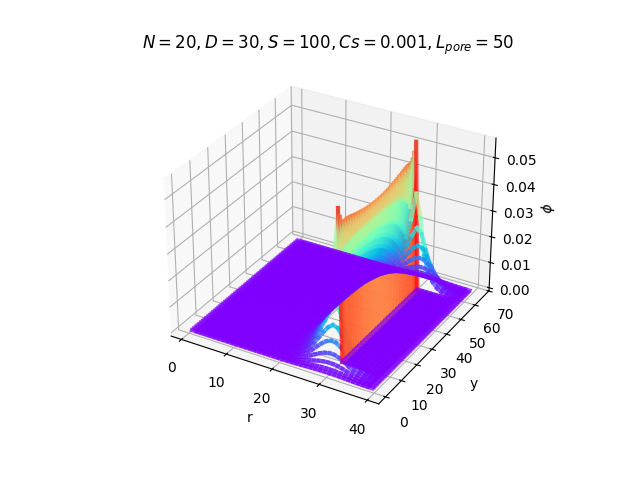

In [23]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Нормализуем значения z для работы с colormap
norm = plt.Normalize(vmin=df["combined_phi"].min(), vmax=df["combined_phi"].max())
cmap = plt.cm.rainbow

# Построение линий с градиентом по оси z
for y_val, group in df.groupby("y"):
    x = group["x"].values
    z = group["combined_phi"].values
    y = np.full_like(x, y_val)

    # Получаем цвета для каждого значения z
    colors = cmap(norm(z))

    # Рисуем линию с градиентом цвета
    for i in range(len(x) - 1):
        ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=colors[i], alpha=0.7, linewidth=3)

# Настройка графика
ax.set_xlabel("r")
ax.set_ylabel("y")
ax.set_zlabel("$\\phi$")
ax.set_title(f"$N = {N}, D = {D}, S = {S}, Cs = {Cs}, L_{{pore}} = {L_pore}$")

# # Добавление цветовой шкалы
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=15)
# cbar.set_label("$\\psi$")

# html_file = f"3D_phi_{N=}_{D=}_{S=}_{Cs=}_{L_pore=}.html"
# mpld3.save_html(fig, html_file)

# plt.show()

# Профиль потенциала

<>:27: SyntaxWarning: invalid escape sequence '\ '
<>:27: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_2908714/605727110.py:27: SyntaxWarning: invalid escape sequence '\ '
  ax.set_title("$3D \ профиль \ \\psi \ vs \ r \ vs \ y$")


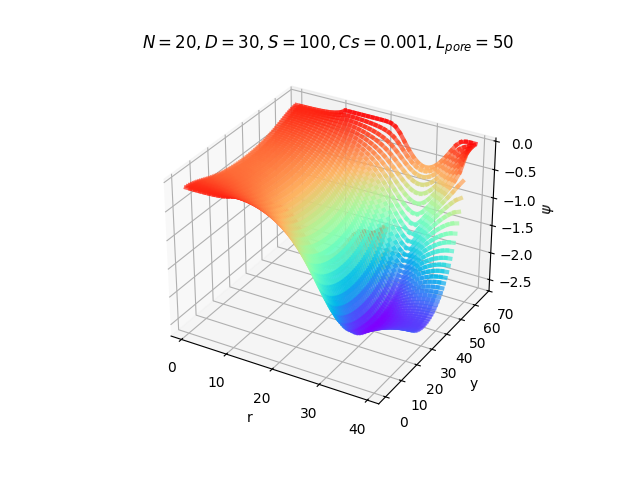

In [24]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Нормализуем значения z для работы с colormap
norm = plt.Normalize(vmin=df["sys_noname_psi"].min(), vmax=df["sys_noname_psi"].max())
cmap = plt.cm.rainbow

# Построение линий с градиентом по оси z
for y_val, group in df.groupby("y"):
    x = group["x"].values
    z = group["sys_noname_psi"].values
    y = np.full_like(x, y_val)

    # Получаем цвета для каждого значения z
    colors = cmap(norm(z))

    # Рисуем линию с градиентом цвета
    for i in range(len(x) - 1):
        ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=colors[i], alpha=0.7, linewidth=3)

# Настройка графика
ax.set_xlabel("r")
ax.set_ylabel("y")
ax.set_zlabel("$\\psi$")
ax.set_title("$3D \ профиль \ \\psi \ vs \ r \ vs \ y$")
ax.set_title(f"$N = {N}, D = {D}, S = {S}, Cs = {Cs}, L_{{pore}} = {L_pore}$")

# # Добавление цветовой шкалы
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=15)
# cbar.set_label("$\\psi$")

plt.show()